In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def show_image(img, vmax=1, save_img_name=None):
    if save_img_name != None:
        cv2.imwrite('img_out/' + save_img_name + '.jpg', img)
    
    plt.imshow(img, cmap='gray', vmin=0, vmax=vmax)
    plt.axis('off')
    plt.show()

In [33]:
maps = {}

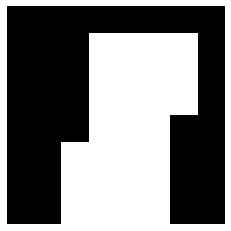

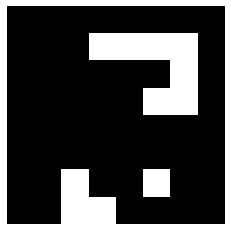

In [85]:
maps["explored"] = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0]])

maps["obstacles"] = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0]])

desired_result = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1]])

combined_result = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 2, 3, 3, 3, 3, 0],
    [0, 2, 2, 1, 1, 1, 3, 0],
    [0, 2, 2, 1, 1, 3, 3, 0],
    [0, 2, 2, 1, 1, 1, 2, 2],
    [2, 2, 1, 1, 1, 1, 2, 2],
    [0, 2, 3, 1, 1, 3, 2, 0],
    [0, 0, 3, 3, 1, 1, 2, 2]])

show_image(maps["explored"])
show_image(maps["obstacles"])
# show_image(desired_result)
# show_image(combined_result, vmax=3)

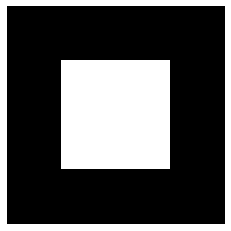

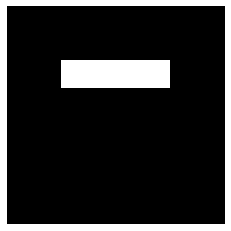

In [91]:
maps["explored"] = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]])

maps["obstacles"] = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]])

show_image(maps["explored"])
show_image(maps["obstacles"])

In [92]:
def frontier_for_region(region, frontier_map, explored, obstacles):
    frontier_indices = ([], [])
    map_width, map_height = frontier_map.shape
    
    for i in range(len(region[0])):
        x, y = (region[0, i], region[1, i])

        offsets = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        for offset in offsets:
            x_frontier, y_frontier = (x + offset[0], y + offset[1])

            # Check if idx is out of bounds
            if obstacles[x,y]\
                or x_frontier < 0 or x_frontier >= map_width\
                or y_frontier < 0 or y_frontier >= map_height:
                continue

            # Check if this is a valid point for the frontier
            if not frontier_map[x_frontier, y_frontier] and\
                not explored[x_frontier, y_frontier] and\
                not obstacles[x_frontier, y_frontier]:
                frontier_indices[0].append(x_frontier)
                frontier_indices[1].append(y_frontier)

    return frontier_indices

def generate_frontier(frontier_width, explored, obstacles):
    frontier_map = np.zeros_like(explored)

    # find boundary
    explored_indices = np.where(explored==1)

    # repeat for n steps to define border width
    for _ in range(frontier_width):
        explored_indices = frontier_for_region(np.array(explored_indices), frontier_map, explored, obstacles)
        for i in range(len(explored_indices[0])):
            frontier_map[explored_indices[0][i], explored_indices[1][i]] = 1

    return frontier_map      

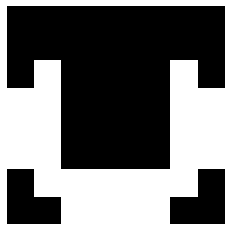

In [93]:
frontier = generate_frontier(frontier_width=2, explored=maps["explored"], obstacles=maps["obstacles"])
show_image(frontier)

In [151]:
# points = np.array([[1, 2], [4, 7], [7, 6], [5, 1]])
points = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])

dist = 0
for i, pos in enumerate(points):
    for j in range(i+1, 4):
        dist += np.sqrt((points[j][0] - pos[0])**2 + (points[j][1] - pos[1])**2)

dist

6.82842712474619

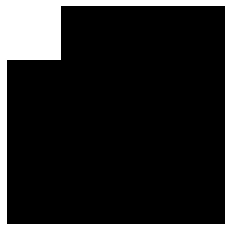

In [152]:
goal_map = np.zeros(shape=(8,8), dtype=int)
for p in points:
    goal_map[p[0], p[1]] = 1
    
show_image(goal_map)